For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?
(Null hypothesis) H0: Has not increased
H1: Has increased

True positive - Determine that it has gone up.
True negative - Find that it has not changed.

(False Positive) Type I error: Determine that it increased or stayed the same and it didnt.
Type II error: Say that it decreased or stayed the same when it actually increased.

Would use a paired T test

Is the website redesign any good?
H0 : No change or decreased
H1: Increase in visits since redesigned website

True positive - It increased
True negative- It decreased or stayed the same.

Type I error : Determine it actually decreased or stayed the same instead of increased.
Type II error : Determine that it actually increased instead of decreased.

Would use independent sample T-test because easier to control.

Is our television ad driving more sales?
H0 : The television ad has made no difference in sales.
H1: The ad has increased more sales.

True positive - It increased
True negative - It decreased or stayed the same.

Type I error - Increased and it has. 
Type II error - Determine that it actually decreased when it actually increased. 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

What are we comparing?
-Average time (numberic continous values) for two different groups (categories)
- One sample or two sample?
-One tailed or two tailed?

scipy.stats.ttest_ind_from_stats(mean1, sdev1, nobs1, mean2, sdev2, nobs2, equal_var = False)

In [15]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import env
import pydataset
from pydataset import data

Form a hypothesis:

h_0:average time to sell at office 1 == average time to sell at office 2


h_a: average time to sell at office 1 != average time to sell at office 2

In [2]:
alpha = .05

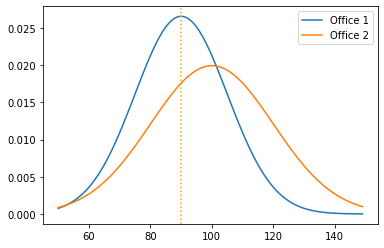

In [3]:
#visualize distributions


x = np.arange(50, 150)

y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'Office 1')
plt.plot(x, y2, label = 'Office 2')
plt.axvline(90, ls = ":", color = "orange")

plt.legend()

In [4]:
stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False)

Ttest_indResult(statistic=-2.7091418459143854, pvalue=0.00811206270346016)

Load the mpg dataset and use it to answer the following questions:

In [5]:
mpg = data('mpg')

NameError: name 'data' is not defined

In [ ]:
mpg.head(3)

In [ ]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
# H_o : # There is no difference in fuel - efficiency in cars from 2008 to 1999.
# H_A : There is a difference in same cars.

In [ ]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()

In [ ]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe


#plot
fe_2008.hist()

In [ ]:
fe_1999.hist()

In [ ]:
# (N>30,we we meet normality condition, not an issue due to sample size)

fe_2008.count(), fe_1999.count()

In [ ]:
# Variance is the same 


fe_2008.var(), fe_1999.var()

In [ ]:
# # stats Levene test - returns p value. small p-value means unequal variances
stats.levene(fe_2008, fe_1999)

# high p-value suggests that the populations have equal variances

In [ ]:
# calculate t-statistic and p value

t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

In [ ]:
if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [ ]:
fe_2008.mean(), fe_1999.mean()

In [ ]:
plt.hist([fe_1999, fe_2008], label=['1999 Cars', '2008 Cars'])
plt.legend()

In [ ]:
# Are compact cars more fuel-efficient than the average car?
# H0 : MPG for compact cars is <= the mpg for average car
# HA: MPG for compact cars is > mpg for average car 

In [ ]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
pop_mean = mpg.avg_fe.mean()

In [ ]:
# Do manual cars get better gas mileage than automatic cars?
mpg.head()

In [ ]:
mpg.trans.value_counts()

In [ ]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

In [ ]:
fe_auto.hist()

In [ ]:
fe_manual.hist()

In [ ]:
# look at variance
fe_auto.var(), fe_manual.var()

In [ ]:
# Levene Test
stats.levene(fe_auto, fe_manual)

In [ ]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

In [ ]:
fe_manual.mean(), fe_auto.mean()

In [ ]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

In [ ]:
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Manual transmission gets better fuel effiency')

In [ ]:
# this is not part of the lesson, just showing how to use ENV properly
url = env.get_db_url('employees')
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

salaries.head()

Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [ ]:
telco = pd.read_csv("telco.csv")
telco.head()

${H_O}$: There is no linear relation between tenure and monthly charges.

${H_1}$: There is a linear relation between tenure and monthly charges.




---------------------------------------------------------------------



${H_O}$: There is no linear relation between tenure and total charges.

${H_1}$: There is a linear relation between tenure and total charges.

In [ ]:
r, p = stats.pearsonr(telco.monthly_charges, telco.tenure)
telco.plot.scatter(y='monthly_charges', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [ ]:
r, p = stats.pearsonr(telco.monthly_charges, telco.tenure)
telco.plot.scatter(y='monthly_charges', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [ ]:
df.total_charges = df.total_charges.replace(' ', np.nan).astype(float)

In [ ]:
df.info()

In [ ]:
df = df.dropna()
df.info()

In [ ]:
df.plot.scatter(y='total_charges', x='tenure')
r, p = stats.pearsonr(df.tenure, df.total_charges)
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

## Controlling for phone and internet services

In [ ]:
sns.relplot(data=df, y='monthly_charges', x='tenure', hue='internet_service', style='phone_service')

Use the employees database.

Is there a relationship between how long an employee has been with the company and their salary?
Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
query = '''
SELECT
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()
'''
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [ ]:
salaries = pd.read_sql(query, url)
salaries.head()

${H_O}$: There is no linear relation between tenure and salary.

${H_1}$: There is a linear relation between tenure and salary.

In [ ]:
r, p = stats.pearsonr(salaries.salary, salaries.tenure)
salaries.plot.scatter(y='salary', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [ ]:
## how to grab titles
query = '''
SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)
'''
employees_with_titles = pd.read_sql(query, url)
employees_with_titles.head()

${H_O}$: There is no linear relation between tenure and titles.

${H_1}$: There is a linear relation between tenure and titles.

In [ ]:
r, p = stats.pearsonr(employees_with_titles.n_titles, employees_with_titles.tenure)
employees_with_titles.plot.scatter(y='n_titles', x='tenure')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

In [ ]:
sleep = pydataset.data('sleepstudy')
sleep.head()

Is there a relationship between days and reaction time?

In [ ]:
r, p = stats.pearsonr(sleep.Days, sleep.Reaction)
sleep.plot.scatter(y='Days', x='Reaction')
print('p=', p)
print('r=', r)

conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
α

if p < alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

Codeup Student	   
Not Codeup Student
Uses a Macbook	49	 20
Doesn't Use Macbook	1	30

In [12]:
conf_interval = 0.95
alpha = 1 - conf_interval

contingency = pd.DataFrame({'codeup_student': [49,1], 'not_codeup': [20,30]}, index=['uses_macbook', 'not_macbook'])
contingency

,codeup_student,not_codeup
uses_macbook,49,20
not_macbook,1,30


In [13]:
chi2, p, degf, expected = stats.chi2_contingency(contingency)

print('Observed\n:')
print(contingency.values)
print('------------------------\nExpected: \n')
print(expected)
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')

Observed
:
[[49 20]
 [ 1 30]]
------------------------
Expected: 

[[34.5 34.5]
 [15.5 15.5]]
------------------------

chi2 = 36.65
p value: 0.0000
We can reject the null hypothesis


Choose another 2 categorical variables from the mpg dataset and perform a chi2
 contingency table test with them. Be sure to state your null and alternative hypotheses.

In [18]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [23]:
conf_interval = 0.95
alpha = 1 - conf_interval

mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto', 'Manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,transmission_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,Auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,Manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,Manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,Auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,Auto


In [25]:
mpg['hwy'].value_counts()

26    32
17    31
29    22
25    15
27    14
19    13
24    13
20    11
18    10
15    10
23     7
28     7
31     7
22     7
16     7
12     5
30     4
32     4
36     2
44     2
35     2
14     2
33     2
21     2
34     1
37     1
41     1
Name: hwy, dtype: int64

In [26]:
a = mpg.hwy
b = mpg.transmission_type

H0: Transmission type independent of highway miles.

In [27]:
# contigency table
observed = pd.crosstab(a,b)
observed

transmission_type,Auto,Manual
hwy,,
12,4,1
14,2,0
15,10,0
16,3,4
17,25,6
18,9,1
19,11,2
20,8,3
21,2,0


In [29]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')

Observed

[[ 4  1]
 [ 2  0]
 [10  0]
 [ 3  4]
 [25  6]
 [ 9  1]
 [11  2]
 [ 8  3]
 [ 2  0]
 [ 5  2]
 [ 6  1]
 [ 8  5]
 [ 9  6]
 [20 12]
 [10  4]
 [ 4  3]
 [ 7 15]
 [ 4  0]
 [ 3  4]
 [ 2  2]
 [ 1  1]
 [ 0  1]
 [ 1  1]
 [ 2  0]
 [ 0  1]
 [ 1  0]
 [ 0  2]]
---
Expected

[[ 3.35470085  1.64529915]
 [ 1.34188034  0.65811966]
 [ 6.70940171  3.29059829]
 [ 4.6965812   2.3034188 ]
 [20.7991453  10.2008547 ]
 [ 6.70940171  3.29059829]
 [ 8.72222222  4.27777778]
 [ 7.38034188  3.61965812]
 [ 1.34188034  0.65811966]
 [ 4.6965812   2.3034188 ]
 [ 4.6965812   2.3034188 ]
 [ 8.72222222  4.27777778]
 [10.06410256  4.93589744]
 [21.47008547 10.52991453]
 [ 9.39316239  4.60683761]
 [ 4.6965812   2.3034188 ]
 [14.76068376  7.23931624]
 [ 2.68376068  1.31623932]
 [ 4.6965812   2.3034188 ]
 [ 2.68376068  1.31623932]
 [ 1.34188034  0.65811966]
 [ 0.67094017  0.32905983]
 [ 1.34188034  0.65811966]
 [ 1.34188034  0.65811966]
 [ 0.67094017  0.32905983]
 [ 0.67094017  0.32905983]
 [ 1.34188034  0.65811966]]
--

Use the data from the employees database to answer these questions:

-Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
-Is an employee's gender independent of whether or not they are or have been a manager?

In [32]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
query = '''SELECT e.gender, d.dept_name
FROM employees AS e
JOIN dept_emp as deptemp ON deptemp.emp_no = e.emp_no
AND to_date > CURDATE()
JOIN departments AS d ON deptemp.dept_no = d.dept_no'''

In [34]:
gender_dept = pd.read_sql(query, url)
gender_dept.head()

,gender,dept_name
0,M,Customer Service
1,F,Customer Service
2,M,Customer Service
3,F,Customer Service
4,F,Customer Service


In [37]:
gender_dept = gender_dept[(gender_dept.dept_name == 'Sales') | (gender_dept.dept_name == 'Marketing')]

In [38]:
observed = pd.crosstab(gender_dept.gender, gender_dept.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [39]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.5f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[ 5864 14999]
 [ 8978 22702]]
------------------------
Expected: 

[[ 5893 14969]
 [ 8948 22731]]
------------------------

chi2 = 0.32
p value: 0.56919
We fail to reject the null hypothesis


In [40]:
# 2nd question

query = '''SELECT e.emp_no, e.gender, dm.dept_no
FROM employees as e
LEFT JOIN dept_manager AS dm ON e.emp_no = dm.emp_no'''

In [41]:
gender_manager = pd.read_sql(query, url)
gender_manager

,emp_no,gender,dept_no
0,10001,M,None
1,10002,F,None
2,10003,M,None
3,10004,M,None
4,10005,M,None
...,...,...,...
300019,499995,F,None
300020,499996,M,None
300021,499997,M,None
300022,499998,M,None


In [44]:
#renaming column, filling in white space

gender_manager = gender_manager.rename(columns={'dept_no': 'manager'}).fillna(0)
gender_manager.head()

,emp_no,gender,manager
0,10001,M,0
1,10002,F,0
2,10003,M,0
3,10004,M,0
4,10005,M,0


In [46]:
# # run an apply function to make manager status a binary
gender_manager['manager'] = np.where(gender_manager.manager == 0, 0, 1)
gender_manager.value_counts()

emp_no  gender  manager
10001   M       0          1
299980  M       0          1
299996  M       0          1
299995  M       0          1
299994  M       0          1
                          ..
110344  F       1          1
110303  F       1          1
110228  F       1          1
110183  F       1          1
499999  M       0          1
Length: 300024, dtype: int64

In [48]:
observered = gender_manager['gender'], gender_manager['manager']
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


H0: Gender is independent of managorial history.

In [49]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n:')
print(observed.values)
print('------------------------\nExpected: \n')
print(expected.astype(int))
print('------------------------\n')
print(f'chi2 = {chi2:.2f}')
print(f'p value: {p:.4f}')
if p < alpha:
      print('We can reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

Observed
:
[[ 5864 14999]
 [ 8978 22702]]
------------------------
Expected: 

[[ 5893 14969]
 [ 8948 22731]]
------------------------

chi2 = 0.32
p value: 0.5692
We fail to reject the null hypothesis
